In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [2]:
# DATA PATH
TRAIN_DATA_PATH = os.path.join("..","datasets","processed","train.csv")
TEST_DATA_PATH = os.path.join("..","datasets","processed","test.csv")

In [3]:
train = pd.read_csv(TRAIN_DATA_PATH, parse_dates=['Month'], index_col='Month', squeeze=True)
test = pd.read_csv(TEST_DATA_PATH, parse_dates=['Month'], index_col='Month', squeeze=True)

### Datos

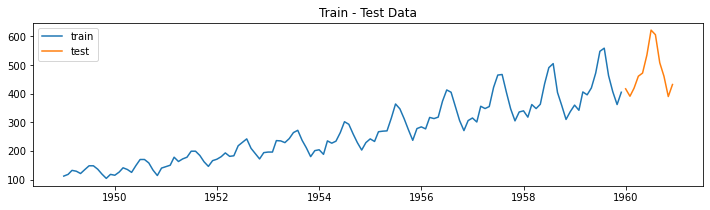

In [11]:
plt.figure(figsize=(12,3))
plt.title("Train - Test Data")
plt.plot(train)
plt.plot(test)
plt.legend(['train','test'])
plt.show()

## Modelo

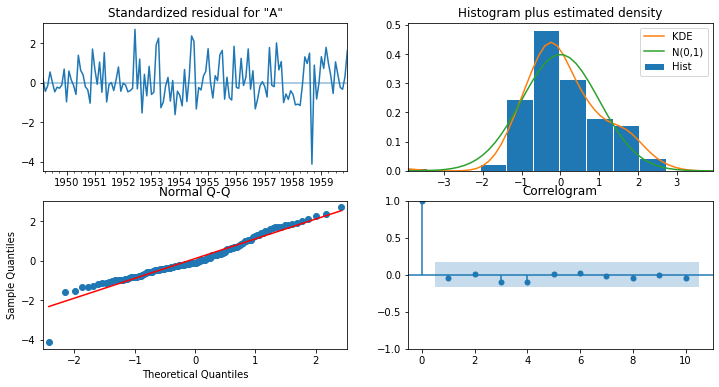

In [5]:
model = ARIMA(train, order=(12,2,15))
model_fit = model.fit()

model_fit.plot_diagnostics(figsize=(12, 6))
plt.show()

### Pronóstico

<AxesSubplot:xlabel='Month'>

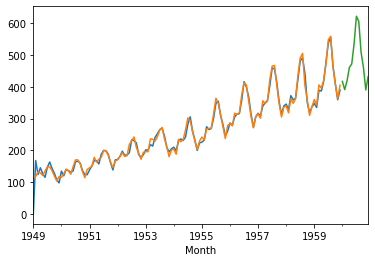

In [61]:
pred = model_fit.get_prediction(steps=12)

pred_ci = pred.conf_int() # Confidence Interval
pred.predicted_mean.plot()
train.plot()
test.plot()
fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

In [7]:
pred_conf = pred.conf_int(alpha=0.05)

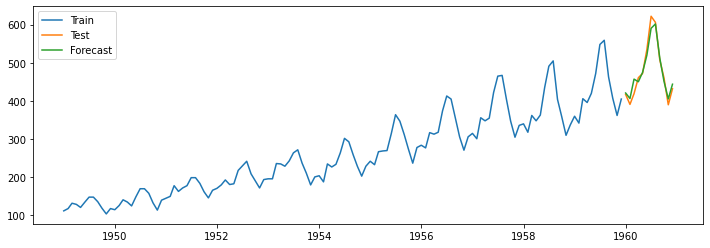

In [10]:
plt.figure(figsize=(12,4))
plt.plot(train)
plt.plot(test)
plt.plot(pred_mean)
plt.legend(['Train','Test','Forecast'])
plt.show()

In [9]:
%run ../auxiliar_functions/forecast_accuracy.py

forecast_accuracy(test, pred_mean)

,Scores
MAE,13.57
MSE,296.67
MAPE,0.03
RMSE,17.22


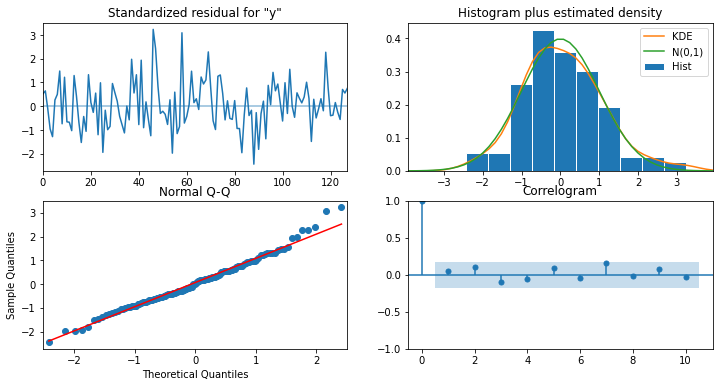

In [37]:
import numpy as np
log_ = np.log(train)
diff1 = np.diff(log_, n=1)
diff2 = np.diff(diff1, n=1)

model1 = ARIMA(diff2, order=(12,2,15))
model1_fit = model1.fit()

model1_fit.plot_diagnostics(figsize=(12, 6))
plt.show()